<a href="https://colab.research.google.com/github/sheetal-vartak/Will-the-Customer-Accept-the-Coupon/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
from google.colab import drive
drive.mount('/content/drive')

#create the DataFrame utilizing Pandas
coupons = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/coupons.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

I will rename the following columns as:
1. "passanger" -> "passenger"

Next, I will find the column values that are NaN.



In [8]:
coupons.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [9]:
coupons_clean = coupons.rename(columns={"passanger": "passenger"})

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
coupons_clean.isna().sum()

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


The column "car" seems to have a huge number of NaN values. Since it is (12576/12684) almost 99% of the time NaN value, we can ignore the column.

For the "bar" column with NaN values, how many rows have accepted coupons?

Based on the following, there are 55 such entries out of about 107 NaN Bar values.

Number of NaN Bar values =  55


Text(0.5, 1.0, 'Bar column with NaN values distribution by Y')

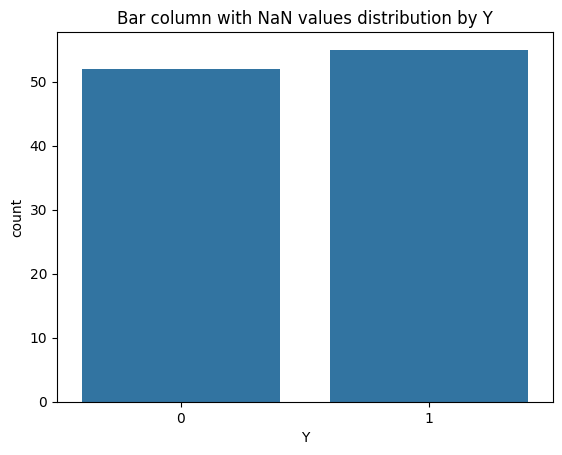

In [11]:
print ("Number of NaN Bar values = ", coupons_clean[(coupons_clean["Bar"].isna()) & (coupons_clean["Y"] == 1)].shape[0])
sns.countplot(data = coupons_clean[coupons_clean["Bar"].isna()], x = "Y").set_title("Bar column with NaN values distribution by Y")

We will fill out the NaN values with the mode value.

In [12]:
coupons_clean['Bar'] = coupons_clean['Bar'].fillna(coupons_clean['Bar'].mode()[0])
coupons_clean['CoffeeHouse'] = coupons_clean['CoffeeHouse'].fillna(coupons_clean['CoffeeHouse'].mode()[0])
coupons_clean['CarryAway'] = coupons_clean['CarryAway'].fillna(coupons_clean['CarryAway'].mode()[0])
coupons_clean['RestaurantLessThan20'] = coupons_clean['RestaurantLessThan20'].fillna(coupons_clean['RestaurantLessThan20'].mode()[0])
coupons_clean['Restaurant20To50'] = coupons_clean['Restaurant20To50'].fillna(coupons_clean['Restaurant20To50'].mode()[0])



4. What proportion of the total observations chose to accept the coupon?



Proportion of the total observations that chose to accept the coupon =  0.5684326710816777


Text(0.5, 1.0, 'Coupon acceptance distribution')

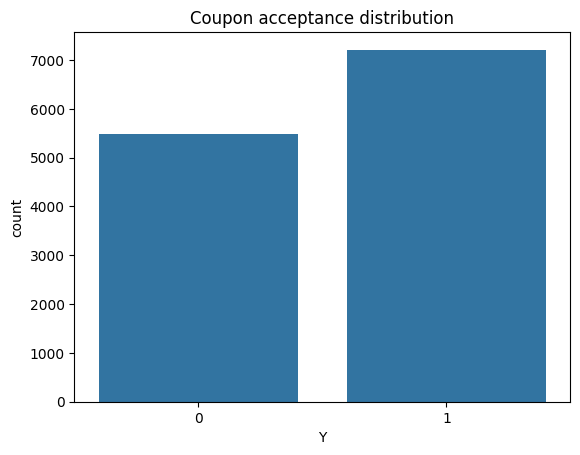

In [13]:
count = coupons_clean["Y"].value_counts()
proportion = count[1] / (count[0] + count[1])
print("Proportion of the total observations that chose to accept the coupon = " , proportion)
sns.countplot(x = "Y", data = coupons_clean).set_title("Coupon acceptance distribution")


5. Use a bar plot to visualize the `coupon` column.

In [14]:
px.bar(coupons_clean, x = "coupon", color = "coupon", title = "Coupon Distribution")

6. Use a histogram to visualize the temperature column.

In [15]:
px.histogram(coupons_clean, x = "temperature", title = "Visualization by Temperature")

Looks like the data does not have any rows pertaining to temperature range 60-80 degrees.

If the coupon venue is in the same direction of where the driver is heading, does it have an impact on coupon acceptance?

Interestingly, drivers have accepted more coupons even when they were not going in the same direction as their destination.

In [16]:
coupons_clean.groupby("direction_same")["Y"].value_counts()
px.bar(coupons_clean, x = "direction_same", y= "Y", title = "Distribution by venue in the direction of destination")

Will a driver accept the coupon based on their personal status? Draw a plot to show.

In [17]:
px.bar(coupons_clean[coupons_clean["Y"] == 1], x = "maritalStatus", color = "maritalStatus", title = "Coupon Acceptance By Personal Status")

Amongst the Single drivers, what coupons are they more likely to accept?

---



In [18]:
px.bar(coupons_clean[(coupons_clean["Y"] == 1) & (coupons_clean["maritalStatus"] == "Single")], x = "coupon", color = "coupon", title = "Single Driver Coupon Distribution")

Amongst the Married drivers, what coupons are they more likely to accept?


In [19]:
px.bar(coupons_clean[(coupons_clean["Y"] == 1) & (coupons_clean["maritalStatus"] == "Married partner")], x = "coupon", color = "coupon", title = "Coupon Acceptance for Married Drivers")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


Text(0.5, 1.0, 'Bar Coupon distribution')

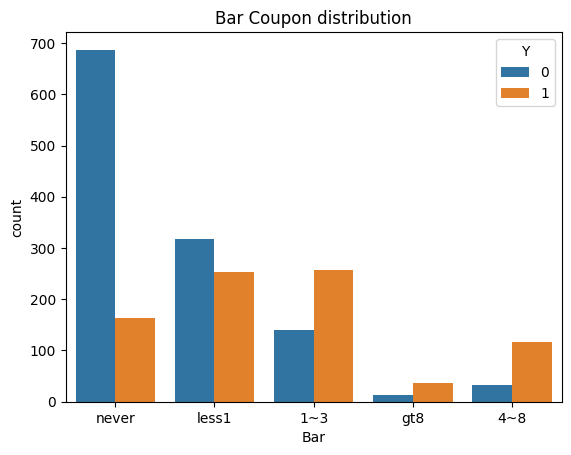

In [20]:
bar_coupons = coupons_clean[coupons_clean["coupon"] == "Bar"]
sns.countplot(x = "Bar", hue = "Y", data = bar_coupons).set_title("Bar Coupon distribution")

2. What proportion of bar coupons were accepted?


Proportion of accepted bar coupons =  0.41001487357461575


Text(0.5, 1.0, 'Bar Coupon acceptance distribution')

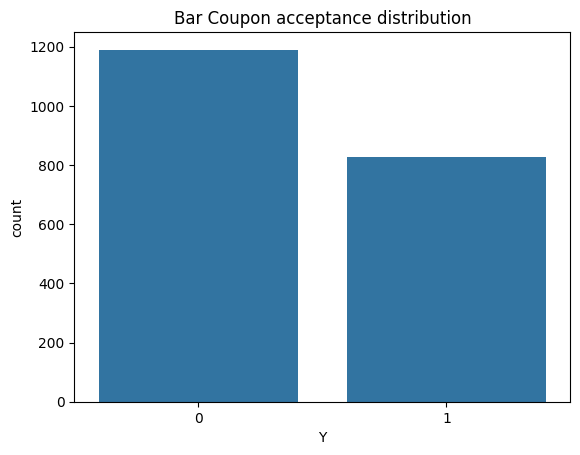

In [21]:
count = bar_coupons["Y"].value_counts()
proportion = count[1] / (count[0] + count[1])
print("Proportion of accepted bar coupons = " , proportion)
sns.countplot(x = "Y", data = bar_coupons).set_title("Bar Coupon acceptance distribution")


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar coupon acceptance for passengers who go to bars less than 3 times =  674
Bar coupon acceptance for passengers who go to bars more than 3 times =  153
Bar coupon acceptance rate of passengers who go less than 3 times a month to those who go more is  0.814993954050786


Text(0.5, 1.0, 'Accepted Bar coupon distribution')

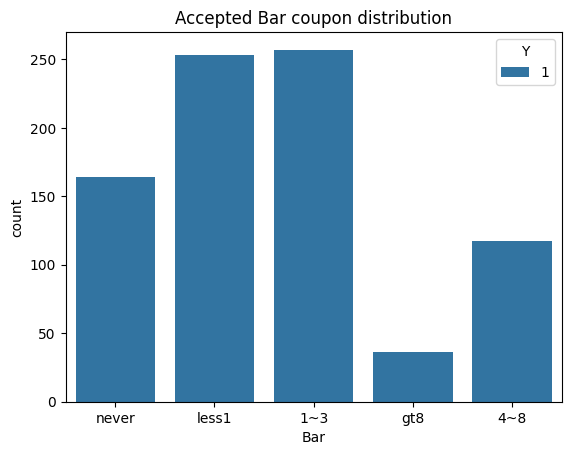

In [22]:
accepted_bar_coupons_count = bar_coupons[bar_coupons["Y"] == 1]

#bar_counts = accepted_bar_coupons_count.groupby("Bar")["Bar"].value_counts()
#print(bar_counts)

bar_less_than_three = ['never','less1','1~3']
acceptance_less_than_3 = accepted_bar_coupons_count.query('Bar in @bar_less_than_three').shape[0]
print("Bar coupon acceptance for passengers who go to bars less than 3 times = ",  + acceptance_less_than_3)


bar_more_than_three = ["4~8", "gt8"]
acceptance_more_than_3 = accepted_bar_coupons_count.query('Bar in @bar_more_than_three').shape[0]
print("Bar coupon acceptance for passengers who go to bars more than 3 times = ",  + acceptance_more_than_3)

print("Bar coupon acceptance rate of passengers who go less than 3 times a month to those who go more is ", + acceptance_less_than_3 / (acceptance_less_than_3 + acceptance_more_than_3))

sns.countplot(x = "Bar", hue = "Y", data = accepted_bar_coupons_count).set_title("Accepted Bar coupon distribution")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Text(0.5, 1.0, 'Accepted Bar coupon distribution By Age')

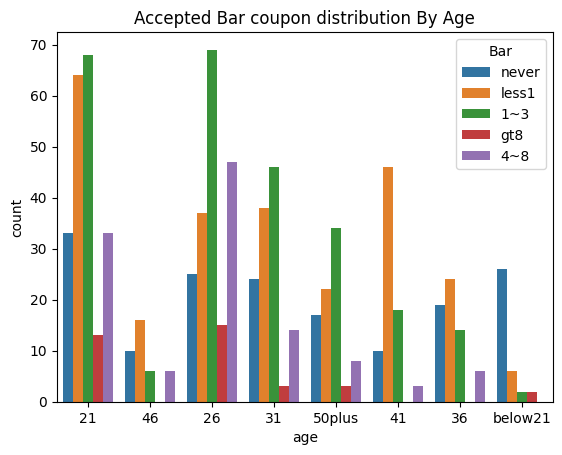

In [23]:
accepted_bar_coupons = bar_coupons[bar_coupons["Y"] == 1]
sns.countplot(x = "age", hue = "Bar", data = accepted_bar_coupons).set_title("Accepted Bar coupon distribution By Age")



Number of accepted coupons by drivers who go to a bar more than once a month and are over the age of 25 =  292
Number of accepted coupons by drivers who are under 25 and do not go to a bar more than once a month =  129
Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 =  0.6935866983372921


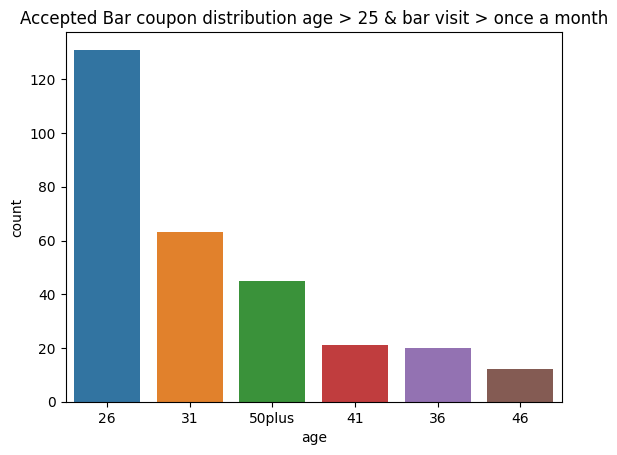

In [27]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
age_greater_than_25 = ['26', '31', '50plus', '41', '36', '46']

query_count = accepted_bar_coupons.query("age in @age_greater_than_25 & Bar in @bar_more_than_once")
print("Number of accepted coupons by drivers who go to a bar more than once a month and are over the age of 25 = ", query_count.shape[0])

all_others_count = accepted_bar_coupons.query("age not in @age_greater_than_25 & Bar not in @bar_more_than_once")
print("Number of accepted coupons by drivers who are under 25 and do not go to a bar more than once a month = ", all_others_count.shape[0])

print("Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25 = ", query_count.shape[0] / (query_count.shape[0] + all_others_count.shape[0]))

sns.countplot(x = "age", data = query_count, hue="age").set_title("Accepted Bar coupon distribution age > 25 & bar visit > once a month")
px.scatter(query_count, x = "age", y = "Bar", marginal_x = "histogram", marginal_y = "histogram", title = "Accepted Bar coupon distribution age > 25 & bar visit > once a month")

Age group of 21-25 and those who frequent the bar 1-3 times a month, seem to have accepted the maximum number of Bar coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [102]:
accepted_bar_coupons["occupation"].value_counts()

,count
occupation,
Student,120
Unemployed,91
Computer & Mathematical,87
Sales & Related,80
Management,65
Office & Administrative Support,53
Business & Financial,41
Education&Training&Library,40
Arts Design Entertainment Sports & Media,33


Number of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry =  393
Acceptance Rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. =  0.4752116082224909


Text(0.5, 1.0, 'Accepted Bar coupon distribution for drivers bars>1 a month and had passengers != kid and had occupations != farming, fishing, or forestry')

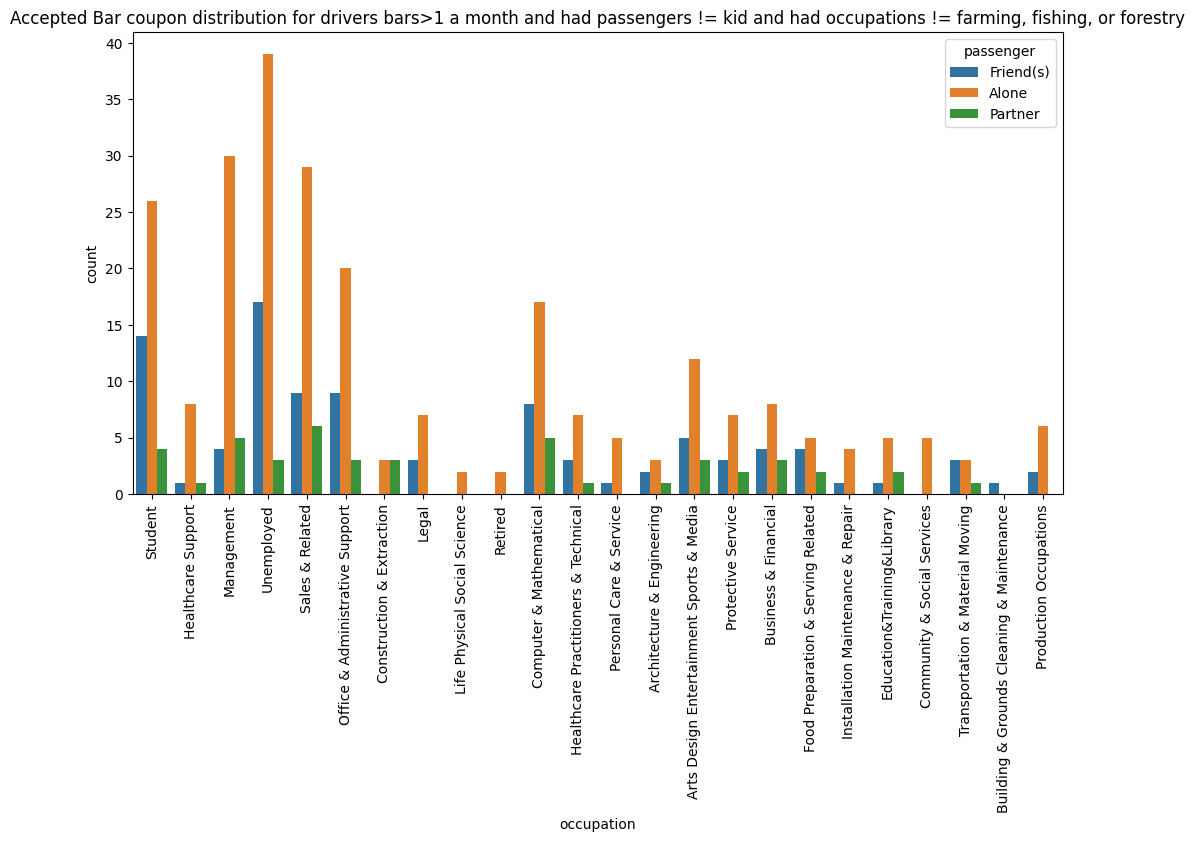

In [41]:
bar_more_than_once = ['1~3', '4~8', 'gt8']
kid_passenger = ["Kid(s)"]
farming_fishing_forestry = ["Farming Fishing & Forestry"]
more_than_once_no_kid_passenger = accepted_bar_coupons.query("Bar in @bar_more_than_once & passenger not in @kid_passenger & occupation not in @farming_fishing_forestry")
print ("Number of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = ", more_than_once_no_kid_passenger.shape[0])
print ("Acceptance Rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. = ", more_than_once_no_kid_passenger.shape[0] / accepted_bar_coupons.shape[0])
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.countplot(x = "occupation", data = more_than_once_no_kid_passenger, hue = "passenger").set_title("Accepted Bar coupon distribution for drivers bars>1 a month and had passengers != kid and had occupations != farming, fishing, or forestry")


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
coupons_clean['Bar']

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  